In [63]:
# Using MA analysis on a Greatland Gold. A company I am personally invested in.
# Part of Udemy course, but changed stock to one im actually invested in.
import yfinance as yf
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline



In [64]:
def download_data(stock, start_date, end_date):
    data={}
    ticker = yf.download(stock,start_date,end_date)
    data['Price'] = ticker['Adj Close']
    return pd.DataFrame(data)

In [77]:
start = '2019-01-01'
end = '2021-10-14'

In [78]:
download_data('GGP.L',start,end)

[*********************100%***********************]  1 of 1 completed


,Price
Date,
2019-01-02,1.780000
2019-01-03,1.770000
2019-01-04,1.800000
2019-01-07,1.850000
2019-01-08,1.875000
...,...
2021-10-06,15.800000
2021-10-07,19.700001
2021-10-08,21.700001


In [79]:
stock_data = download_data('GGP.L',start,end)

[*********************100%***********************]  1 of 1 completed


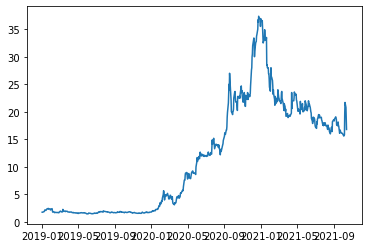

In [80]:
plt.plot(stock_data)

In [81]:
def construct_signals(data,short_peroid,long_peroid):
    data['Short MA'] = data['Price'].rolling(window=short_peroid).mean()
    data['Long MA'] = data['Price'].rolling(window=long_peroid).mean()
    data.dropna(inplace=True)
    return data

In [94]:
data = construct_signals(stock_data,20,100)

In [95]:
def plot_ma_data(data):
    plt.figure(figsize=(12,6))
    plt.plot(data['Price'],label='Stock Price',color='black')
    plt.plot(data['Short MA'],label='Short MA',color='red')
    plt.plot(data['Long MA'],label='Long MA',color='blue')
    plt.title('Moving Average (MA) indicators')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()

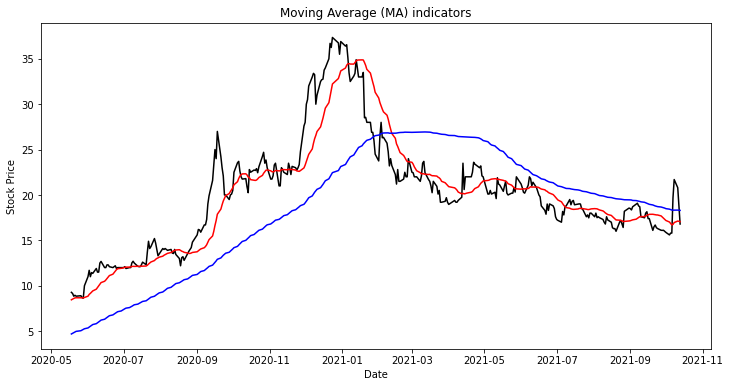

In [96]:
plot_ma_data(data)

In [97]:
#Now using expo weighted average
def ema_signal(data,short_peroid,long_peroid):
    data['Short EMA'] = data['Price'].ewm(span=short_peroid,adjust=False).mean()
    data['Long EMA'] = data['Price'].ewm(span=long_peroid,adjust=False).mean()

In [98]:
ema_signal(data,20,50)

In [101]:
def plot_ema_data(data):
    plt.figure(figsize=(12,6))
    plt.plot(data['Price'],label='Stock Price',color='black')
    plt.plot(data['Short EMA'],label='Short EMA',color='red')
    plt.plot(data['Long EMA'],label='Long EMA',color='blue')
    plt.title('Moving Average (MA) indicators')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()

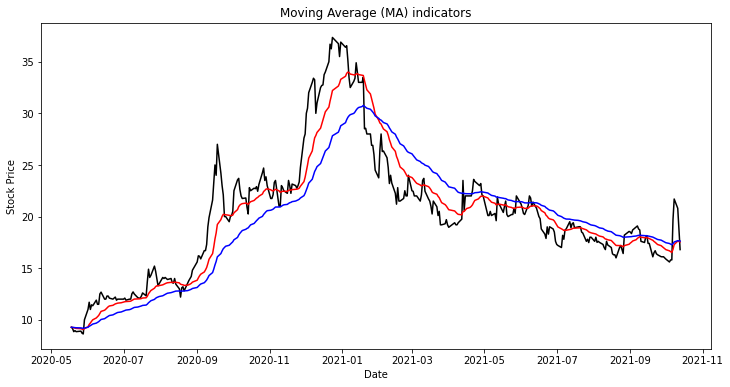

In [102]:
plot_ema_data(data)